In [1]:
import sys
sys.path.append('D:/Learn/git/supervised-learning/model_bin')  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  as lrsk
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import linear_regression as lr

In [25]:
raw_data=pd.read_csv('../data/raw_data_4.csv')
#features= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
#features= ['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
features=['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol','volatile acidity_3','citric acid_3','chlorides_3','total sulfur dioxide_3','density_3','pH_3','sulphates_3','alcohol_3','volatile acidity_e','citric acid_e','chlorides_e','total sulfur dioxide_e','density_e','pH_e','sulphates_e','alcohol_e']
target=['quality']
X=raw_data[features]
y=raw_data[target]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,shuffle=True,random_state=52)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

In [26]:
alpha=0.5e-3
epoch=5000
theta_initial=np.zeros(((X_train.shape[1]),))
b_initial=0


In [27]:
theta_final,b_final,cost_hist=lr.gradient_descent(X_train,y_train,theta_initial,b_initial,alpha,epoch)

iteration    0: Cost  0.14980 
iteration  500: Cost  0.05070 
iteration 1000: Cost  0.02399 
iteration 1500: Cost  0.01671 
iteration 2000: Cost  0.01464 
iteration 2500: Cost  0.01398 
iteration 3000: Cost  0.01370 
iteration 3500: Cost  0.01352 
iteration 4000: Cost  0.01338 
iteration 4500: Cost  0.01325 


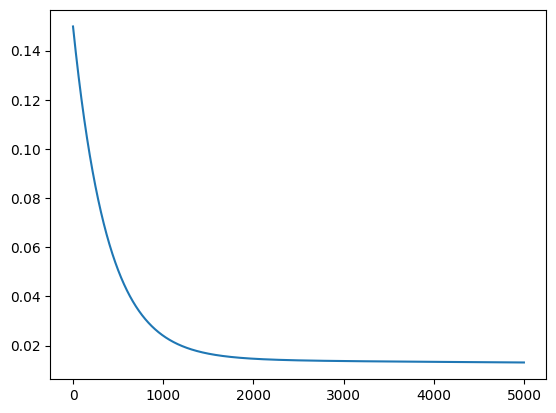

In [28]:
plt.plot(cost_hist)

In [29]:
lr.val_scores(X_train,y_train,theta_final,b_final)

0.013120815513332171

In [30]:
lr.val_scores(X_test,y_test,theta_final,b_final)

0.01207437383177339

In [31]:
lr.val_scores(X_val,y_val,theta_final,b_final)

0.012439702498678533

In [32]:
y_pred=lr.hyp(X_test, theta_final, b_final)

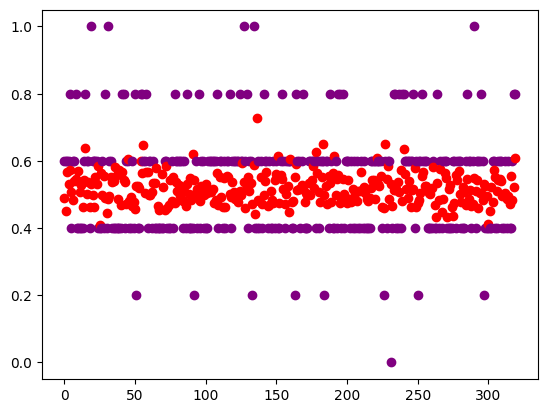

In [33]:
y_test_np=y_test.to_numpy()
for i in range (y_test_np.shape[0]):
    plt.scatter(i,y_test_np[i],c='purple')
    plt.scatter(i,y_pred[i],c='red')



    

In [34]:
r2_score(y_test,y_pred)

0.004111185986859334